# 第8章: ニューラルネット
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

## 70. 単語ベクトルの和による特徴量
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$x_i$を並べた行列$X$と，正解ラベルを並べた行列（ベクトル）$Y$を作成したい．
$$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$$
ここで，$n$は学習データの事例数であり，$x_i \in R^d$とyi∈ℕはそれぞれ，i∈{1,…,n}番目の事例の特徴量ベクトルと正解ラベルを表す． なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．ℕ<4で4未満の自然数（0を含む）を表すことにすれば，任意の事例の正解ラベルyiはyi∈ℕ<4で表現できる． 以降では，ラベルの種類数をLで表す（今回の分類タスクではL=4である）．

i番目の事例の特徴ベクトルxiは，次式で求める．

$$
\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})
$$
ここで，i番目の事例はTi個の（記事見出しの）単語列(wi,1,wi,2,…,wi,Ti)から構成され，emb(w)∈ℝdは単語wに対応する単語ベクトル（次元数はd）である．すなわち，i番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものがxiである．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．300次元の単語ベクトルを用いたので，d=300である．

i番目の事例のラベルyiは，次のように定義する．
$$
% <![CDATA[
y_i = \begin{cases}
0 & (\mbox{記事}x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases} %]]>
$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

- 学習データの特徴量行列: Xtrain∈ℝNt×d
- 学習データのラベルベクトル: Ytrain∈ℕNt
- 検証データの特徴量行列: Xvalid∈ℝNv×d
- 検証データのラベルベクトル: Yvalid∈ℕNv
- 評価データの特徴量行列: Xtest∈ℝNe×d
- 評価データのラベルベクトル: Ytest∈ℕNe

なお，Nt,Nv,Neはそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

In [35]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

# word2becモデル読み込み
model = KeyedVectors.load_word2vec_format('files/GoogleNews-vectors-negative300.bin', binary=True)


from functools import lru_cache

@lru_cache(maxsize=None)
def get_vector(word):
    return model.get_vector(word)

def sentence2vec(text):
    """
    文字列を単語分割→ word2vecでベクトル化した平均を取る
    英単語想定
    """
    # 前処理
    preprocessed_text = text.replace('"','').replace('-','').replace(';','').replace(',','').replace('.','')
    words = preprocessed_text.split(' ')
    result_vec = np.zeros((1,300))
    
    n_error = 0
    for word in words:
        try:
#             result_vec += model.get_vector(word)
            result_vec += get_vector(word)
        except:
            n_error += 1
            
    result_vec = result_vec/n_valid_words if (n_valid_words :=(len(words) - n_error)) != 0 else result_vec
    return result_vec

In [48]:
%%time
import csv



train_path = 'files/train.txt'
train_y = []
train_X = []

with open(train_path) as f:
    reader = csv.DictReader(f,fieldnames=['label','sentense'],delimiter='\t')
    for row in reader:
        train_y.append(int(row['label']))
        train_X.append(sentence2vec(row['sentense']))

train_y = np.array(train_y)
train_X = np.vstack(train_X)
print(f'train_y:{train_y.shape}\ntrain_X:{train_X.shape}')
    



train_y:(10684,)
train_X:(10684, 300)
CPU times: user 1.33 s, sys: 1.87 s, total: 3.2 s
Wall time: 6.83 s


In [49]:
%%time 

valid_path = 'files/valid.txt'
valid_y = []
valid_X = []

with open(valid_path) as f:
    reader = csv.DictReader(f,fieldnames=['label','sentense'],delimiter='\t')
    for row in reader:
        valid_y.append(int(row['label']))
        valid_X.append(sentence2vec(row['sentense']))

valid_y = np.array(valid_y)
valid_X = np.vstack(valid_X)
print(f'valid_y:{valid_y.shape}\nvalid_X:{valid_X.shape}')

valid_y:(1336,)
valid_X:(1336, 300)
CPU times: user 129 ms, sys: 88.9 ms, total: 218 ms
Wall time: 376 ms


In [50]:
%%time
import csv



test_path = 'files/test.txt'
test_y = []
test_X = []

with open(test_path) as f:
    reader = csv.DictReader(f,fieldnames=['label','sentense'],delimiter='\t')
    for row in reader:
        test_y.append(int(row['label']))
        test_X.append(sentence2vec(row['sentense']))

test_y = np.array(test_y)
test_X = np.vstack(test_X)
print(f'test_y:{test_y.shape}\ntest_X:{test_X.shape}')



test_y:(1336,)
test_X:(1336, 300)
CPU times: user 130 ms, sys: 81.6 ms, total: 212 ms
Wall time: 324 ms


## 71. 単層ニューラルネットワークによる予測
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

$$ \hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W),$$
$$ \hat{Y} = {\rm softmax}(X_{[1:4]} W)$$ 

ただし，softmax
はソフトマックス関数，$X_{[1:4]} \in \mathbb{R}^{4 \times d}$
は特徴ベクトル$x_1,x_2,x_3,x_4$
を縦に並べた行列である．

行列$W \in \mathbb{R}^{d \times L}$
は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，$\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L$
は未学習の行列$W$
で事例$x_1$
を分類したときに，各カテゴリに属する確率を表すベクトルである． 同様に，$ \hat{Y} \in \mathbb{R}^{n \times L}$
は，学習データの事例$x_1,x_2,x_3,x_4$
について，各カテゴリに属する確率を行列として表現している．



In [39]:
import torch #基本モジュール
from torch.autograd import Variable #自動微分用
import torch.nn as nn #ネットワーク構築用
import torch.optim as optim #最適化関数
import torch.nn.functional as F #ネットワーク用の様々な関数

In [208]:
train = torch.utils.data.TensorDataset(torch.from_numpy(train_X), torch.from_numpy(train_y))
train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test = torch.utils.data.TensorDataset(torch.from_numpy(test_X), torch.from_numpy(test_y))
valid = torch.utils.data.TensorDataset(torch.from_numpy(valid_X), torch.from_numpy(valid_y))


In [93]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(300,4)

    def forward(self, x):
        x = self.fc1(x)
        x = F.softmax(x,dim=-1)
        return x

Net(
  (fc1): Linear(in_features=300, out_features=4, bias=True)
)

In [97]:
model = Net()
print(model)
print(list(model.parameters()))

Net(
  (fc1): Linear(in_features=300, out_features=4, bias=True)
)
[Parameter containing:
tensor([[ 0.0451, -0.0102,  0.0102,  ..., -0.0080, -0.0556, -0.0337],
        [-0.0302,  0.0146, -0.0323,  ...,  0.0185,  0.0107,  0.0139],
        [ 0.0523, -0.0566,  0.0192,  ..., -0.0006,  0.0544,  0.0084],
        [-0.0511, -0.0249,  0.0241,  ...,  0.0175,  0.0467, -0.0072]],
       requires_grad=True), Parameter containing:
tensor([-0.0221, -0.0443, -0.0551, -0.0533], requires_grad=True)]


In [94]:
# x0のpredict
x0 , y0 = train[0]
pred = model(x0.float())
pred

tensor([0.2586, 0.2599, 0.2422, 0.2394], grad_fn=<SoftmaxBackward>)

In [99]:
# x0~3のpredict
X0_3, y0_3 = train[:4]
pred = model(X0_3.float())
pred

tensor([[0.2715, 0.2510, 0.2437, 0.2338],
        [0.2595, 0.2567, 0.2400, 0.2438],
        [0.2544, 0.2525, 0.2440, 0.2491],
        [0.2623, 0.2477, 0.2481, 0.2419]], grad_fn=<SoftmaxBackward>)

## 72. 損失と勾配の計算
学習データの事例$x_1$
と事例集合$x_1,x_2,x_3,x_4$
に対して，クロスエントロピー損失と，行列$W$
に対する勾配を計算せよ．なお，ある事例$x_i$
に対して損失は次式で計算される．

$$ l_i = - \log [\mbox{事例}x_i\mbox{が}y_i\mbox{に分類される確率}]$$

ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

In [143]:
#Loss関数の指定
criterion = nn.CrossEntropyLoss()

#一連の流れ
pred = model(x0.float())
print(pred.reshape(1,-1))
print(y0.reshape(1,))
#ここでラベルデータに対するCross-Entropyがとられる
loss = criterion(pred.reshape(1,-1), y0.reshape(1,))
loss

tensor([[0.2715, 0.2510, 0.2437, 0.2338]], grad_fn=<ViewBackward>)
tensor([2])


tensor(1.3927, grad_fn=<NllLossBackward>)

In [156]:
#Loss関数の指定
criterion = nn.CrossEntropyLoss()

#一連の流れ
pred = model(X0_3.float())
print(pred)
print(y0_3)
#ここでラベルデータに対するCross-Entropyがとられる
loss = criterion(pred, y0_3)
loss

tensor([[0.2715, 0.2510, 0.2437, 0.2338],
        [0.2595, 0.2567, 0.2400, 0.2438],
        [0.2544, 0.2525, 0.2440, 0.2491],
        [0.2623, 0.2477, 0.2481, 0.2419]], grad_fn=<SoftmaxBackward>)
tensor([2, 0, 2, 0])


tensor(1.3839, grad_fn=<NllLossBackward>)

## 73. 確率的勾配降下法による学習
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列$W$
を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

In [182]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
model = Net()
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0 
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs.float()), Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data
    print(f"epoch:{epoch} ave_loss:{running_loss/(i+1)}")

epoch:0 ave_loss:1.224206805229187
epoch:1 ave_loss:1.221551537513733
epoch:2 ave_loss:1.2189805507659912
epoch:3 ave_loss:1.2164584398269653
epoch:4 ave_loss:1.2139328718185425
epoch:5 ave_loss:1.2114380598068237
epoch:6 ave_loss:1.209043264389038
epoch:7 ave_loss:1.2065529823303223
epoch:8 ave_loss:1.204145908355713
epoch:9 ave_loss:1.2017842531204224
epoch:10 ave_loss:1.1994602680206299
epoch:11 ave_loss:1.1971625089645386
epoch:12 ave_loss:1.1949009895324707
epoch:13 ave_loss:1.1926612854003906
epoch:14 ave_loss:1.1904484033584595
epoch:15 ave_loss:1.188302755355835
epoch:16 ave_loss:1.1861532926559448
epoch:17 ave_loss:1.1840252876281738
epoch:18 ave_loss:1.182041883468628
epoch:19 ave_loss:1.1799561977386475
epoch:20 ave_loss:1.1779520511627197
epoch:21 ave_loss:1.1759485006332397
epoch:22 ave_loss:1.1739140748977661
epoch:23 ave_loss:1.1719497442245483
epoch:24 ave_loss:1.1700948476791382
epoch:25 ave_loss:1.1682766675949097
epoch:26 ave_loss:1.166313648223877
epoch:27 ave_loss:

## 74. 正解率の計測
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [206]:
from sklearn.metrics import accuracy_score
# train
t_X, t_y = train[:]
print(f'train acc: {accuracy_score(t_y,np.argmax(model(t_X.float()).data,axis=1))}')

# test
t_X, t_y = test[:]
print(f'test acc: {accuracy_score(t_y,np.argmax(model(t_X.float()).data,axis=1))}')

train acc: 0.7803257207038562
test acc: 0.7791916167664671


## 75. 損失と正解率のプロット
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [274]:
from dataclasses import dataclass
import  matplotlib.pyplot as plt

@dataclass
class FitHistory:
    loss_list :list
    acc_train_list: list
    acc_valid_list: list
    def plot(self):
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.plot(range(len(self.loss_list)),self.loss_list,label='loss')
        plt.plot(range(len(self.acc_train_list)),self.acc_train_list,label='train acc')
        plt.plot(range(len(self.acc_valid_list)),self.acc_valid_list,label='valid acc')
        plt.legend()
        plt.show()
        plt.close()
        time.sleep(10)
    


100%|██████████| 50/50 [00:11<00:00,  4.32it/s]


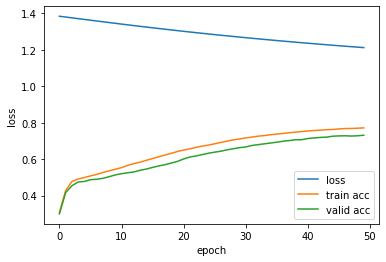

In [258]:
from tqdm import tqdm
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

history = FitHistory()
for epoch in tqdm(range(50)):  # loop over the dataset multiple times
    running_loss = 0.0 
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs.float()), Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # train
    X, y = train[:]
    acc_train = accuracy_score(y,np.argmax(model(X.float()).data,axis=1))
    # test
    X, y = valid[:]
    acc_valid = accuracy_score(y,np.argmax(model(X.float()).data,axis=1))
#     print(f"~ epoch {epoch} ~ \nloss:{running_loss/(i+1)}\nacc[train]:{acc_train}\nacc[valid]:{acc_valid}\n\n")
    history.loss_list.append(running_loss/(i+1))
    history.acc_train_list.append(acc_train)
    history.acc_valid_list.append(acc_valid)
history.plot()

## 76. チェックポイント
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [ ]:
# モデルの保存
# torch.save(model.state_dict(), 'model.pth')

## 77. ミニバッチ化
問題76のコードを改変し，B
事例ごとに損失・勾配を計算し，行列$W$
の値を更新せよ（ミニバッチ化）．B
の値を1,2,4,8,…
と変化させながら，1エポックの学習に要する時間を比較せよ．

100%|██████████| 50/50 [05:13<00:00,  6.28s/it]


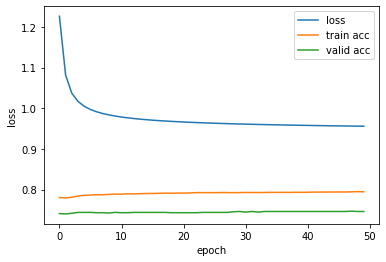

  0%|          | 0/50 [00:00<?, ?it/s]

[batch_size] 1
[elasp time] 324.1779749393463




100%|██████████| 50/50 [00:19<00:00,  2.63it/s]


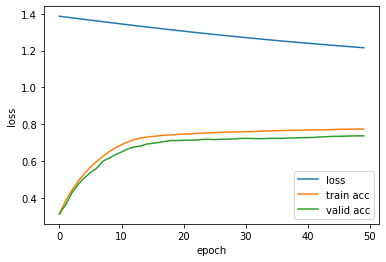

  0%|          | 0/50 [00:00<?, ?it/s]

[batch_size] 100
[elasp time] 29.407253980636597




100%|██████████| 50/50 [00:17<00:00,  2.80it/s]


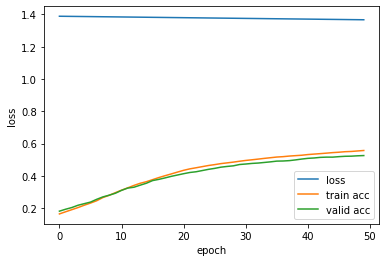

[batch_size] 1000
[elasp time] 28.296889066696167




In [275]:
import time
for batch_size in (1,100,1000):
    str = time.time()
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

    history = FitHistory(loss_list=[],acc_train_list=[],acc_valid_list=[])
    for epoch in tqdm(range(50)):  # loop over the dataset multiple times
        running_loss = 0.0 
        for i, data in enumerate(train_loader):
            inputs, labels = data
            inputs, labels = Variable(inputs.float()), Variable(labels)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        # train
        X, y = train[:]
        acc_train = accuracy_score(y,np.argmax(model(X.float()).data,axis=1))
        # test
        X, y = valid[:]
        acc_valid = accuracy_score(y,np.argmax(model(X.float()).data,axis=1))
    #     print(f"~ epoch {epoch} ~ \nloss:{running_loss/(i+1)}\nacc[train]:{acc_train}\nacc[valid]:{acc_valid}\n\n")
        history.loss_list.append(running_loss/(i+1))
        history.acc_train_list.append(acc_train)
        history.acc_valid_list.append(acc_valid)
    history.plot()
    print(f'[batch_size] {batch_size}\n[elasp time] {time.time()-str}\n\n')

## 78. GPU上での学習
問題77のコードを改変し，GPU上で学習を実行せよ．

## 79. 多層ニューラルネットワーク
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．